#### This note book focuses on analysis on why people are leaving an organization. It uses the IBM HR data available from Kaggle

In [1]:
# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Data Set
hr_data = pd.read_csv('IBM_Attrition.csv')

In [3]:
#Displaying the Top 5 rows in Data Set
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Check if any Column's has NA or Missing Values
hr_data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [5]:
#Shape of the Data
hr_data.shape

(1470, 35)

In [6]:
#Data Types of Columns
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Show how much % of employees left the organization
hr_data.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

### EDA

Text(0,0.5,'Count')

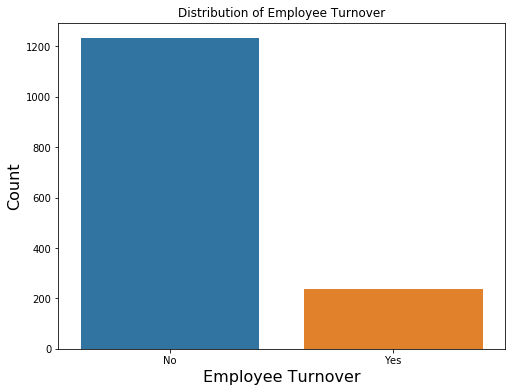

In [8]:
plt.figure(figsize=(8,6))
Attrition=hr_data.Attrition.value_counts()
sb.barplot(x=Attrition.index ,y=Attrition.values)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)

We can clearly see that Dataset in Imbalanced(84% No , 16% Yes)

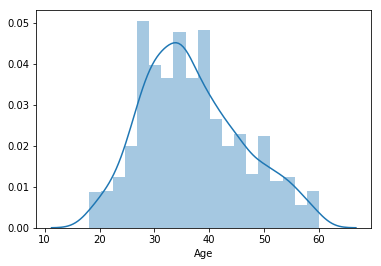

In [9]:
sb.distplot(hr_data['Age'])

Age is fairly normally distributed with average Age around 35

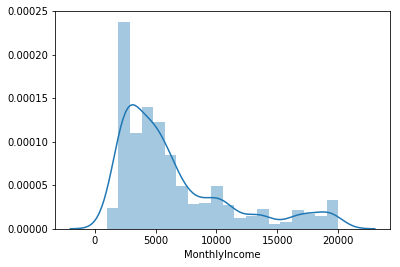

In [10]:
sb.distplot(hr_data['MonthlyIncome'])

Most the employees have their monthly income around 5000$ and is Rightly Skewed

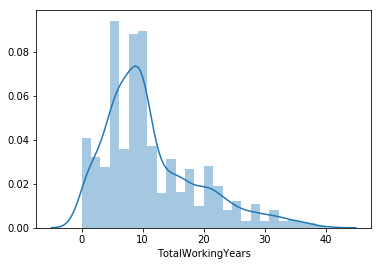

In [11]:
sb.distplot(hr_data['TotalWorkingYears'])

Total Working Years is also right skewed similar to Age

In [12]:
#Method that plot density plots on the columns passed as input
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sb.kdeplot(hr_data.loc[(hr_data['Attrition'] == 'No'),var] , color='b',shade=True, label='no Attrition') 
    ax=sb.kdeplot(hr_data.loc[(hr_data['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))
    

In [13]:
numerical_df=hr_data.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

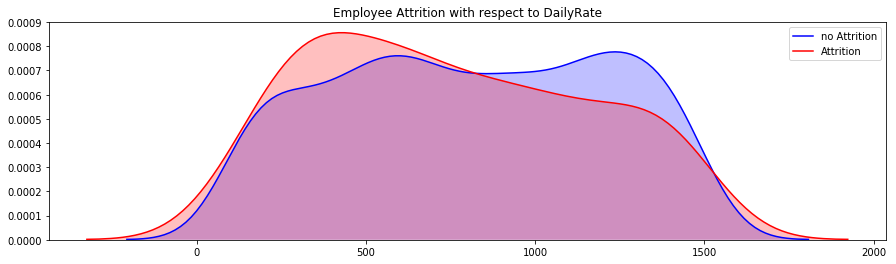

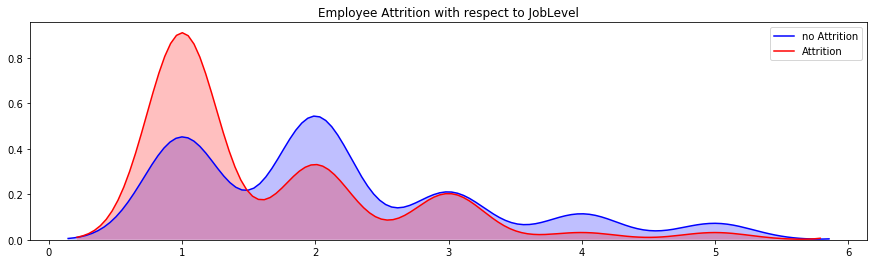

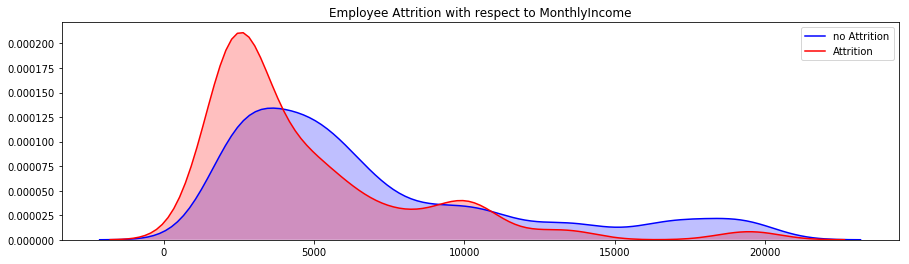

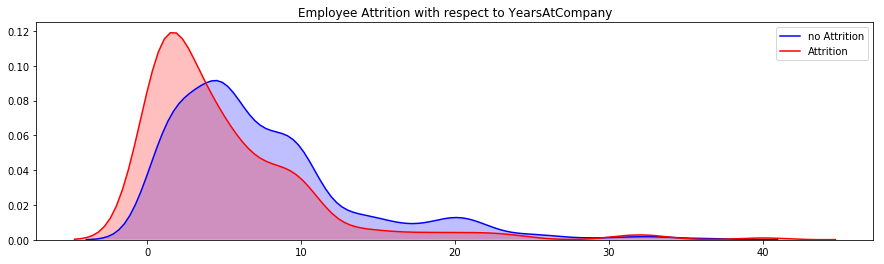

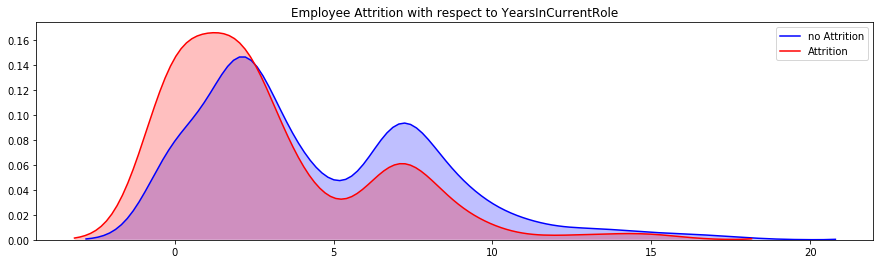

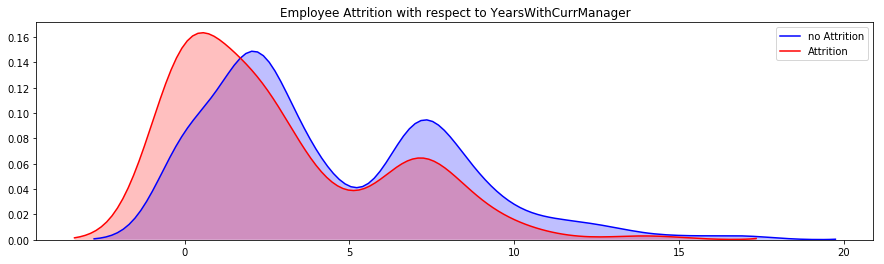

In [14]:
#Plotting KDE plots
for n in numeric_cols_kdeplot:
    kdePlot(n)

### Observations

Attrition is high with Employees having joblevel as 1.


Employees whose monthly income is below $5000 have high attrition.


Employees who worked in the company around 0 to 1 years have high attrition.


Employees who are in current role for around 0 to 4 years have high attrition.

In [15]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

In [16]:
#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(hr_data[var],hr_data.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

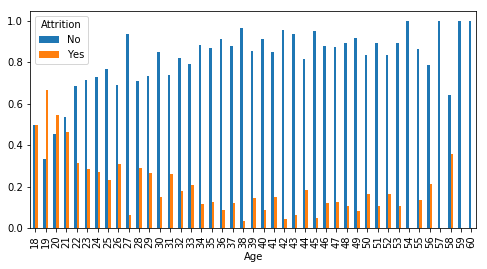

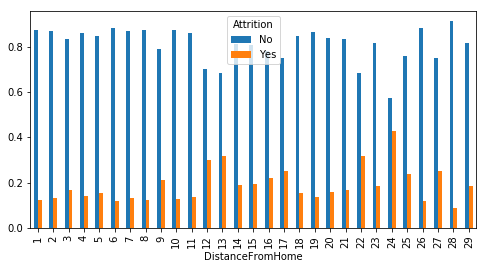

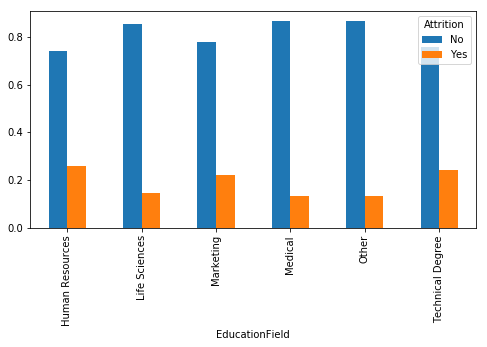

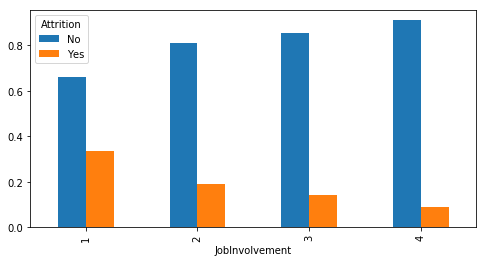

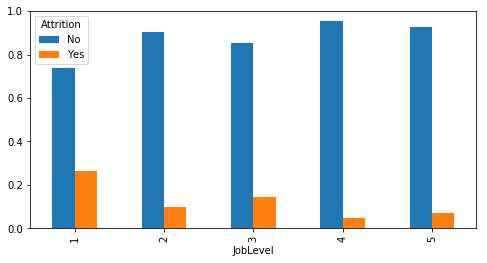

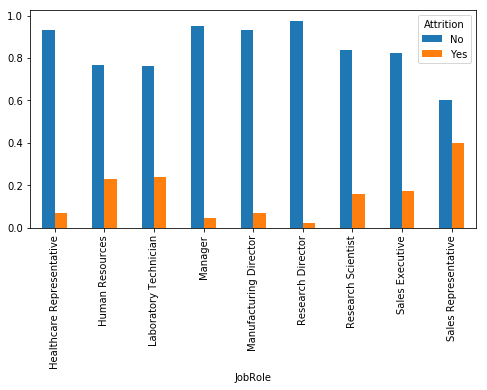

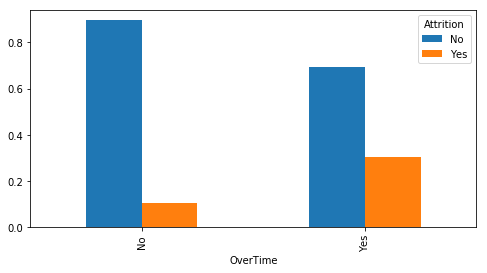

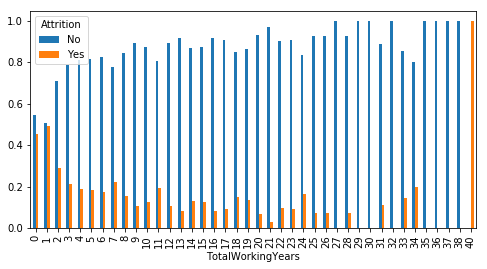

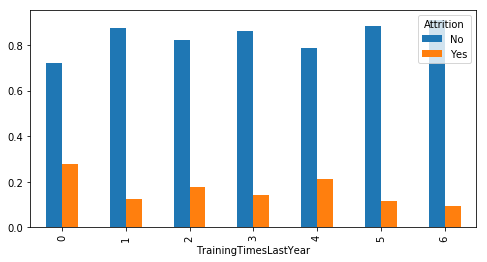

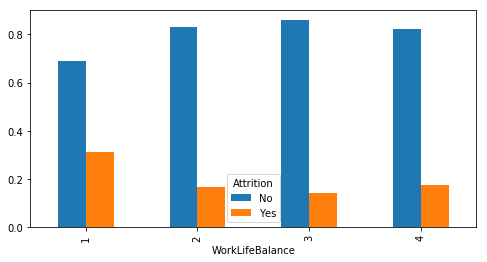

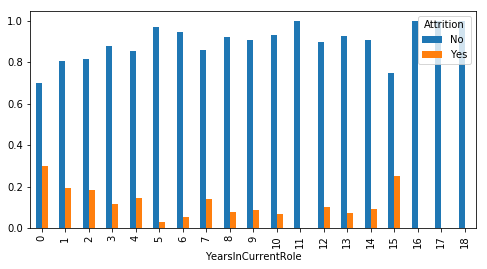

In [17]:
for col in BarPlot_columns:
    Bar_plots(col)

### Observations

Attrition is very high with employees having age in between 18 to 22. These might be due to students who are doing intership or small contract jobs

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

In [18]:
#Replacing Yes with 1 and No with 0 in Attrition Column
hr_data['Attrition']=np.where(hr_data['Attrition']=='No', #condition
                 0, #value if condition is true
                 1)

In [19]:
hr_data.describe().iloc[:,:20]

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000


In [20]:
hr_data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [21]:
hr_data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [22]:
len(set(hr_data.EmployeeNumber))

1470

In [23]:
hr_data=hr_data.drop(['EmployeeCount', 'StandardHours','EmployeeNumber'], axis=1)

In [24]:
hr_data.groupby('Attrition').mean().iloc[:,:20]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
Attrition,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802


In [25]:
hr_data.groupby('Attrition').mean().iloc[:,20:26]

,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,
0,4.484185,2.234388,4.367397
1,2.902954,1.945148,2.852321


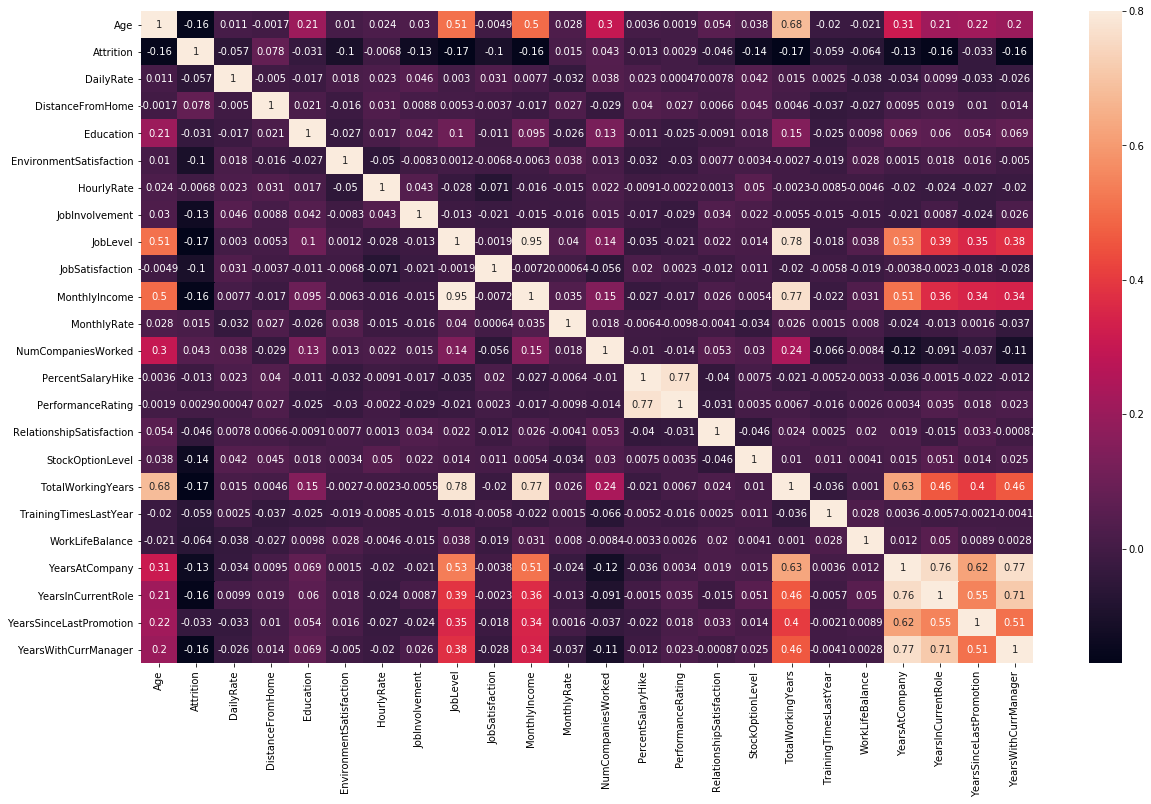

In [26]:
corr_matrix = hr_data.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix,vmax=0.8, annot=True)

In [27]:
numerical_df=hr_data.select_dtypes(include=np.number)
categorical_df=hr_data.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

In [28]:
for n in categorical_cols:
    print(pd.crosstab(hr_data['Attrition'],hr_data[n],normalize='columns'))

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569
Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
0                       0.757576  
1                       0.242424  
Gender       Female      Male
Attrition    

In [29]:
categorical_df_dummies=pd.get_dummies(hr_data[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)

In [30]:
final_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,3,4,1,6,3,3,2,2,2,2


In [31]:
y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

In [32]:
#Splitting Data in Train and Test Set
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [33]:
#Building base model(Predicting that no employee leaves the company)
base=np.zeros(1470)
print(accuracy_score(base,hr_data.Attrition))

0.8387755102040816


Base model has 83.8% accuracy. Thus accuracy is not best criteria to check the performance of the model

In [34]:
#Method that applies model on the data and Predict the attrition
def model(mod,model_name,x_tr,y_tr,x_tes,y_te):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("     ",model_name,"      ")
    print("Accuracy ",accuracy_score(pred_dt,y_te))
    print("ROC_AUC  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix  \n",cm)
    print("                    Classification Report \n",classification_report(pred_dt,y_te))

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model(lr,"Logistic Regression",X_train,y_train,X_test,y_test)

      Logistic Regression       
Accuracy  0.8605442176870748
ROC_AUC   0.762956204379562
Confusion Matrix  
 [[240  34]
 [  7  13]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.97      0.88      0.92       274
          1       0.28      0.65      0.39        20

avg / total       0.92      0.86      0.89       294



Accuracy is 85% but Precision and Recall for class 1 is low

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
model(dt,"Decision Tree",X_train,y_train,X_test,y_test)

      Decision Tree       
Accuracy  0.8503401360544217
ROC_AUC   0.7186617100371747
Confusion Matrix  
 [[236  33]
 [ 11  14]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.96      0.88      0.91       269
          1       0.30      0.56      0.39        25

avg / total       0.90      0.85      0.87       294



Accuracy is 85% but Precision and Recall for class 1 is low

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_depth=4)
model(rf,"Random Forest",X_train,y_train,X_test,y_test)

      Random Forest       
Accuracy  0.8367346938775511
ROC_AUC   0.5876288659793815
Confusion Matrix  
 [[245  46]
 [  2   1]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.99      0.84      0.91       291
          1       0.02      0.33      0.04         3

avg / total       0.98      0.84      0.90       294



Accuracy is 85% but Precision for class 1 is low

### Due to Class Imbalance problem model is not able to make predictions on class 1(Attrition Yes)

In [38]:
#Performing OverSample using SMOTE(Synthetic Minority Over Sampling Technique)
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [39]:
X_sm, y_sm=smote.fit_sample(X,y)

In [40]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=100)

In [41]:
#logistic Regression for OverSampled Data 
lr_sm=LogisticRegression()
model(lr_sm,"Logistic Regression",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

      Logistic Regression       
Accuracy  0.8016194331983806
ROC_AUC   0.8040313919867823
Confusion Matrix  
 [[187  38]
 [ 60 209]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.76      0.83      0.79       225
          1       0.85      0.78      0.81       269

avg / total       0.81      0.80      0.80       494



Accuracy is 79%(low) but Precision and Recall for class 1 is improved

In [42]:
dt_sm=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
model(dt_sm,"Decision Tree",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

      Decision Tree       
Accuracy  0.8441295546558705
ROC_AUC   0.8476914414414414
Confusion Matrix  
 [[221  51]
 [ 26 196]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.89      0.81      0.85       272
          1       0.79      0.88      0.84       222

avg / total       0.85      0.84      0.84       494



Accuracy is 83% but Precision and Recall for class 1 is improved

In [43]:
rf_sm=RandomForestClassifier(n_estimators=10,max_depth=4)
model(rf_sm,"Random Forest",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

      Random Forest       
Accuracy  0.9089068825910931
ROC_AUC   0.9090745113472387
Confusion Matrix  
 [[227  25]
 [ 20 222]]
                    Classification Report 
              precision    recall  f1-score   support

          0       0.92      0.90      0.91       252
          1       0.90      0.92      0.91       242

avg / total       0.91      0.91      0.91       494



Accuracy is high and  Precision and Recall for class 1 is also High